<a href="https://colab.research.google.com/github/angelaportillo/AI_IB/blob/main/AF4_Supervised_learning_model_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF4-Supervised learning model: Decision tree.
## Activity: Decision Tree Model - Breast Cancer Wisconsin Dataset
Hour:N1 Career:IB

###Team members

2028256 Angela Marisa Zapata Portillo

2016872 Marian Roxana Martínez Serrato

2016052 Pablo Ezaú Zapata Cruz

2043428 David Aldebaran Cardona Padilla

2132042 Jennifer Morales Enciso



In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
# Upload the CSV file
data = pd.read_csv('data.csv')

# Display the basic structure of the dataset
print("Dataset size:", data.shape)
data.head()


Dataset size: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print("Available columns:", data.columns)

# Convert labels to numeric values ​​(1 = Malignant, 0 = Benign)
if 'diagnosis' in data.columns:
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
    target_column = 'diagnosis'
elif 'target' in data.columns:
    target_column = 'target'
else:
    raise ValueError("Diagnostic column ('diagnosis' or 'target') not found.")

# Separate variables (X) and labels (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split data into training (80%) and testing (20%)
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training:", train_data.shape, "Test:", test_data.shape)


Available columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Training: (455, 32) Test: (114, 32)


In [ ]:
# Create the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
model.fit(train_data, train_labels)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions with test data
predictions = model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

# Classification report
print("\nClassification report:\n")
print(classification_report(test_labels, predictions))


Exactitud del modelo: 92.98%

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



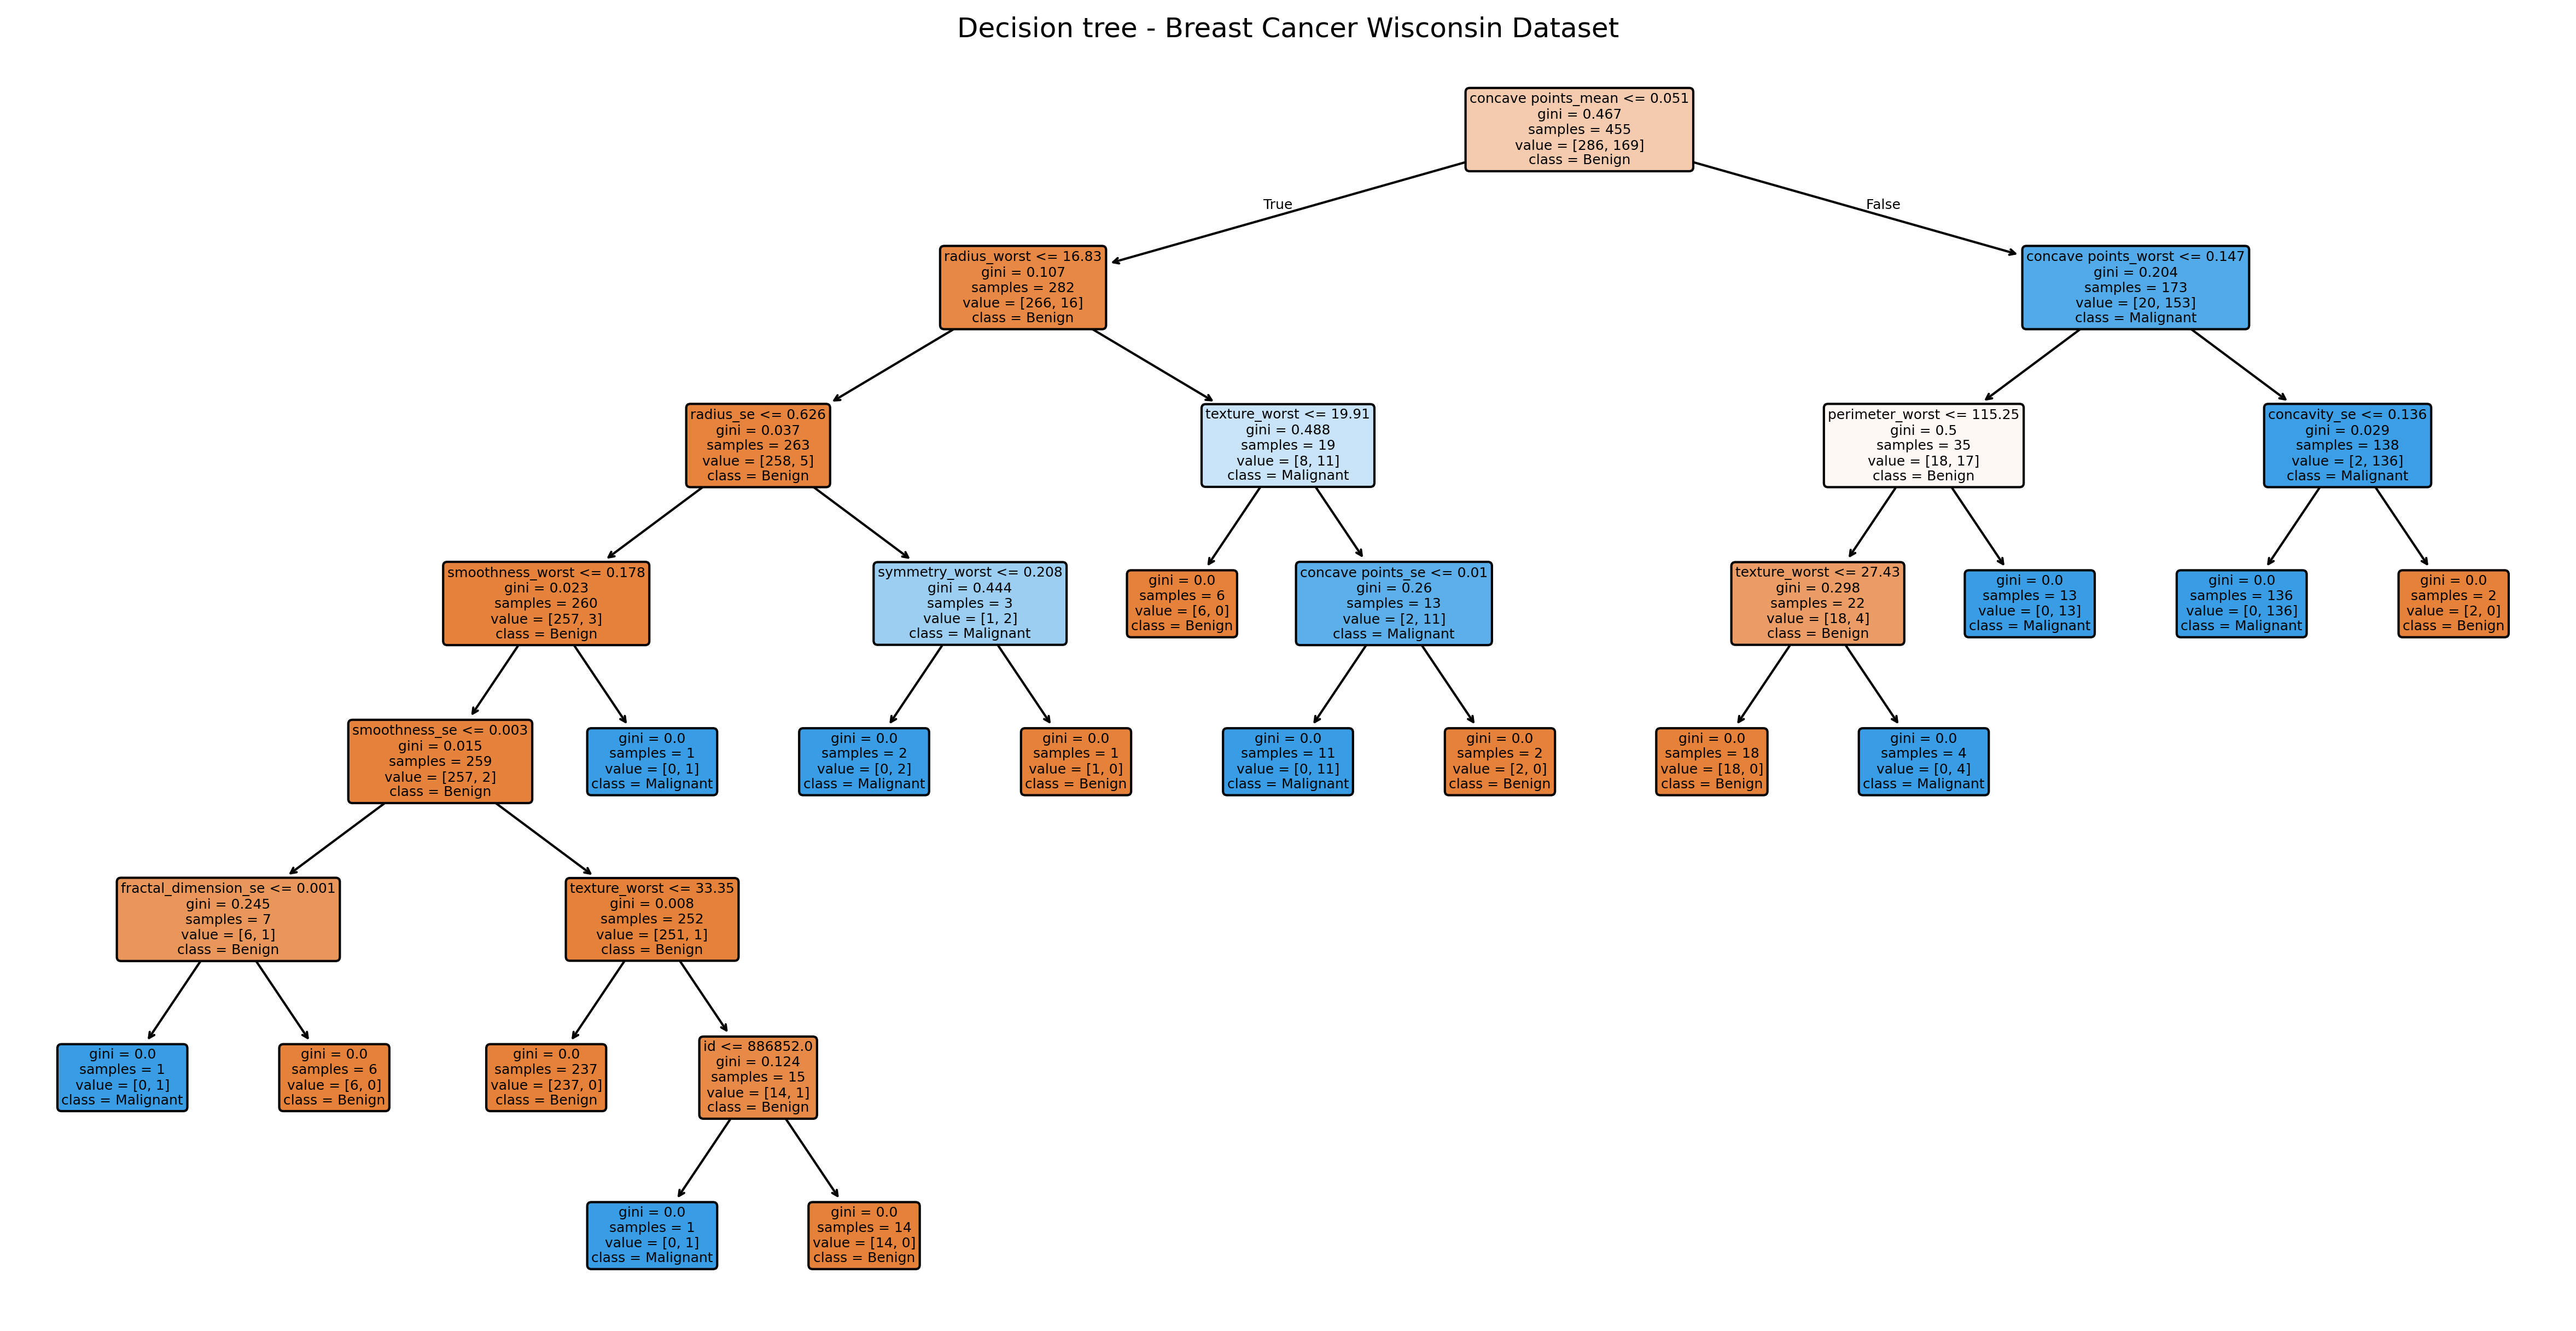

In [ ]:
# Graphing the decision tree
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(model,
          feature_names=X.columns,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=6)
plt.title("Decision tree - Breast Cancer Wisconsin Dataset", fontsize=12)
plt.show()
